## Whale Portfolio

In [254]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as plt
%matplotlib inline

## Data Cleaning

#### Read the Whale Portfolio daily returns and clean the data

In [255]:
# Read the whale csv file
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [256]:
# Count the Nulls
whale_returns.isna().sum().sum()

4

In [257]:
# Drop nulls
whale_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [258]:
# Caculate Daily Retuns
whale_returns = pd.read_csv('whale_returns.csv').pct_change
whale_returns

<bound method NDFrame.pct_change of             Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0     2015-03-02                        NaN                 NaN   
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                             NaN                     NaN  
1                       -0.000496      

## Algorithmic Daily Returns
##### Read the daily algorithmic daily returns

In [259]:
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [260]:
# Count Nulls
algo_returns.isna().sum().sum()

6

In [261]:
# Drop Nulls
algo_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

##### Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [262]:
# Read S&P 500 csv
sp_500 = pd.read_csv('sp500_history.csv')

In [263]:
# Fix Data Type
sp_500.Close=sp_500.Close.str.replace('$', '')
sp_500

<ipython-input-263-a0e4002fc85c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_500.Close=sp_500.Close.str.replace('$', '')


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [264]:
# Fix the Data Type extended 
sp_500.Close = sp_500.Close.astype(float)

In [265]:
sp_500_returns = sp_500.set_index('Date')
sp_500_returns

,Close
Date,
23-Apr-19,2933.68
22-Apr-19,2907.97
18-Apr-19,2905.03
17-Apr-19,2900.45
16-Apr-19,2907.06
...,...
5-Oct-12,1460.93
4-Oct-12,1461.40
3-Oct-12,1450.99


In [266]:
# Plot the S&P Daily Returns
sp_500_returns.plot

<AxesSubplot:xlabel='Date'>

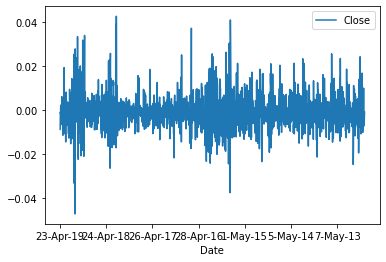

In [267]:
# Use the pct_change function to caculate the Daily Returns
sp_500_returns = sp_500_returns.pct_change()
sp_500_returns.plot()

In [268]:
# Drop count nulls
sp_500.isna().sum().sum()

0

In [269]:
# Drop nulls 
sp_500_returns = sp_500.dropna()
sp_500

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [270]:
# Display Summary Statistics of 'S&P 500'
sp_500.Close.describe()

count    1649.000000
mean     2154.279460
std       402.122004
min      1353.330000
25%      1880.050000
50%      2089.140000
75%      2473.450000
max      2933.680000
Name: Close, dtype: float64

### Rename `Close` Column to be specific to this Portfolio.

In [271]:
# Drop Nulls
sp_500_returns = sp_500.dropna()
sp_500_returns

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


## Combine Whale, Algorithmic & S&P 500 Returns 

In [272]:
# Join Whale Returns, Algorithmic, & S&P 500 Returns into a Single DataFrame with columns for each portfolio's returns.
whale_returns = pd.read_csv(('whale_returns.csv'),parse_dates=True, infer_datetime_format=True)
sp_500_returns = pd.read_csv(('sp500_history.csv'),parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv(('algo_returns.csv'),parse_dates=True, infer_datetime_format=True)
all_returns = pd.concat([whale_returns, sp_500_returns, algo_returns], axis='columns',join='inner')
all_returns.set_index('Date')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close,Algo 1,Algo 2
Date,,,,,,,
"(2015-03-02, 23-Apr-19, 2014-05-28)",NaN,NaN,NaN,NaN,$2933.68,0.001745,NaN
"(2015-03-03, 22-Apr-19, 2014-05-29)",-0.001266,-0.004981,-0.000496,-0.006569,$2907.97,0.003978,NaN
"(2015-03-04, 18-Apr-19, 2014-05-30)",0.002230,0.003241,-0.002534,0.004213,$2905.03,0.004464,NaN
"(2015-03-05, 17-Apr-19, 2014-06-02)",0.004016,0.004076,0.002355,0.006726,$2900.45,0.005692,NaN
"(2015-03-06, 16-Apr-19, 2014-06-03)",-0.007905,-0.003574,-0.008481,-0.013098,$2907.06,0.005292,NaN
...,...,...,...,...,...,...,...
"(2019-04-25, 11-Feb-15, 2018-08-03)",-0.000285,-0.001291,-0.005153,0.004848,$2068.53,-0.003656,0.002817
"(2019-04-26, 10-Feb-15, 2018-08-06)",0.008149,0.009162,0.012355,0.010434,$2068.59,0.000529,0.000285
"(2019-04-29, 9-Feb-15, 2018-08-07)",0.001254,0.002719,0.006251,0.005223,$2046.74,0.000207,-0.001330


In [273]:
# Inspect First Few Rows
all_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Close,Date,Algo 1,Algo 2
0,2015-03-02,NaN,NaN,NaN,NaN,23-Apr-19,$2933.68,2014-05-28,0.001745,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,22-Apr-19,$2907.97,2014-05-29,0.003978,NaN
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,18-Apr-19,$2905.03,2014-05-30,0.004464,NaN
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,17-Apr-19,$2900.45,2014-06-02,0.005692,NaN
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,16-Apr-19,$2907.06,2014-06-03,0.005292,NaN


In [274]:
# Fix Data Type
all_returns = all_returns.Close.str.replace('$', '')

<ipython-input-274-f6f34e578c8c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  all_returns = all_returns.Close.str.replace('$', '')


In [275]:
# Continued....
all_returns = all_returns.astype(float)
all_returns

0       2933.68
1       2907.97
2       2905.03
3       2900.45
4       2907.06
         ...   
1055    2068.53
1056    2068.59
1057    2046.74
1058    2055.47
1059    2062.52
Name: Close, Length: 1060, dtype: float64

In [276]:
# Check for Nulls
all_returns.isna().sum().sum()

0

In [277]:
# Display Summary Statistics of All Returns
all_returns.describe()

count    1060.000000
mean     2374.398226
std       305.534512
min      1829.080000
25%      2096.982500
50%      2356.435000
75%      2671.012500
max      2933.680000
Name: Close, dtype: float64

# Conduct Quantitative Analysis

 This section will be calculated, visualize performance, & risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [278]:
all_returns = all_returns.pct_change()

<AxesSubplot:title={'center':'Daily returns'}>

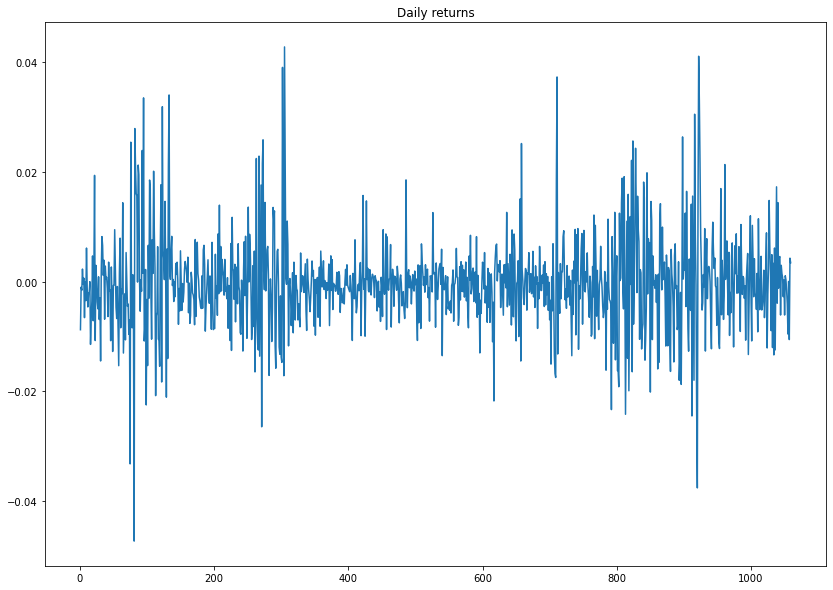

In [279]:
all_returns.plot(title="Daily returns", figsize=(14, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Daily returns'}>

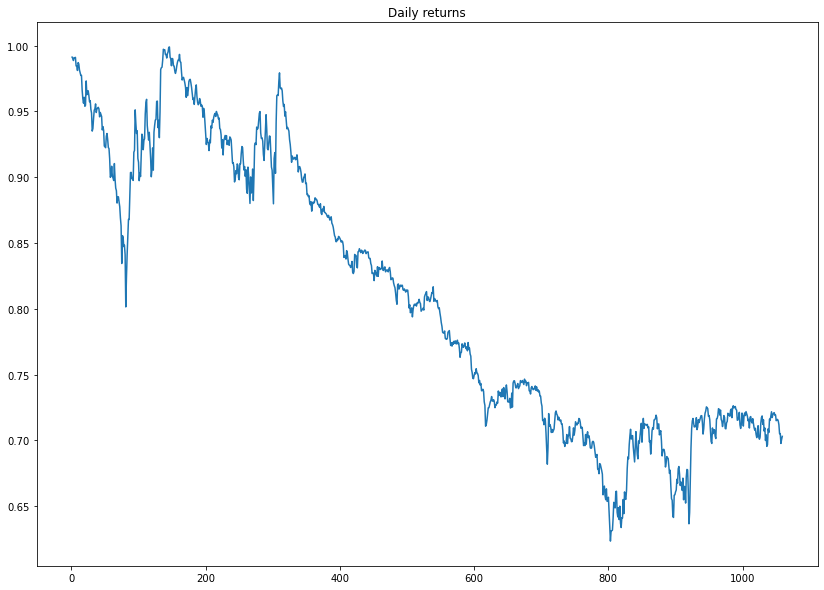

In [280]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(title="Daily returns", figsize=(14, 10))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

<AxesSubplot:title={'center':'Box Plot of Returns'}>

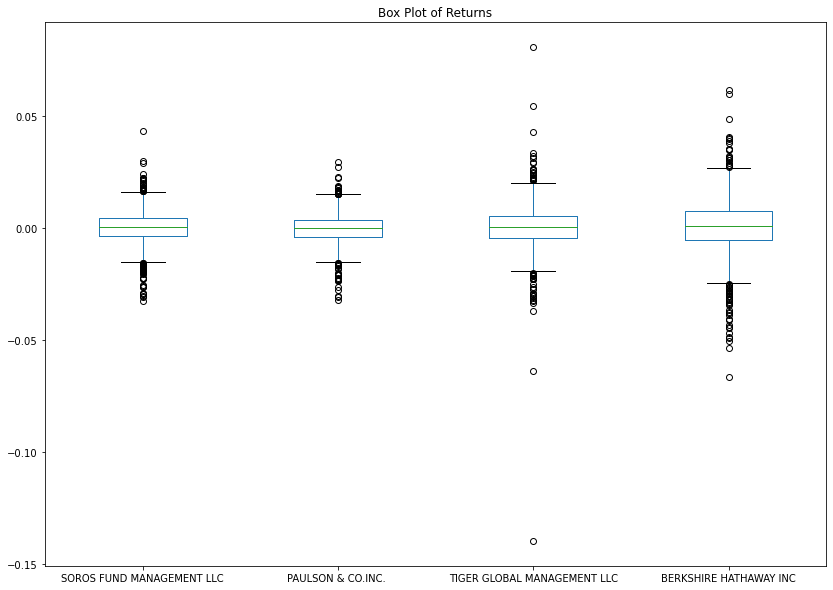

In [281]:
# Whale Returns Box Plot
whale_returns.plot.box(figsize=(14, 10), title="Box Plot of Returns")

<AxesSubplot:title={'center':'Box Plot of Returns'}>

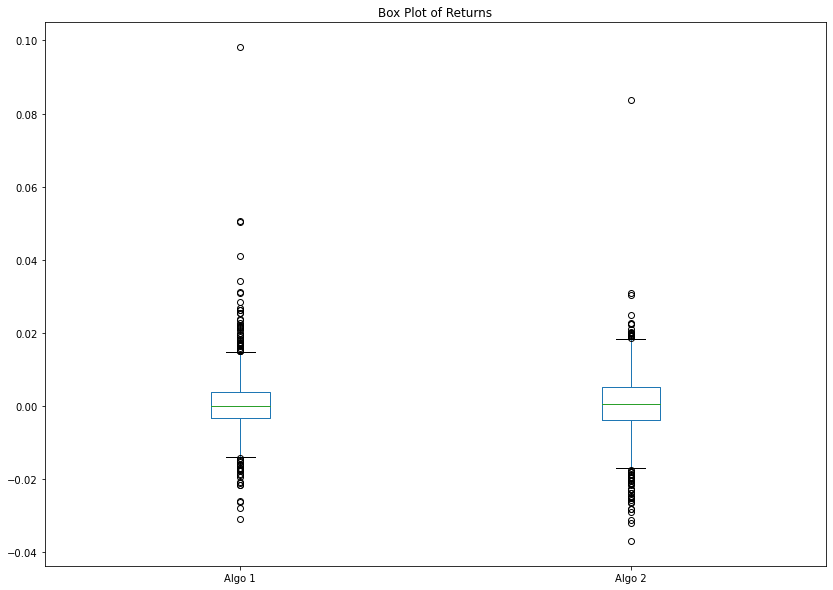

In [282]:
# Algorithmic Box Plot
algo_returns.plot.box(figsize=(14, 10), title="Box Plot of Returns")

<AxesSubplot:title={'center':'Box Plot of Returns'}>

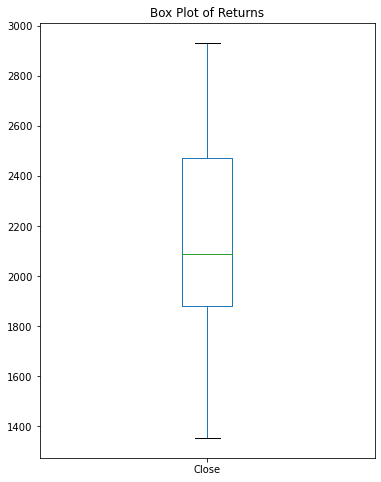

In [283]:
# S&P 500 Box Plot
sp_500.plot.box(figsize=(6, 8), title="Box Plot of Returns")

### Calculate Standard Deviations

In [284]:
# Whale Standard Deviation
whale_returns.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [285]:
# S&P Standard Deviation
sp_500.std()

Close    402.122004
dtype: float64

In [286]:
# Algorithmic Returns Standard Deviation
algo_returns.std()

Algo 1    0.007972
Algo 2    0.008466
dtype: float64

In [287]:
# Calculate the daily standard deviations of all portfolios
all_returns.std()

0.008537361749831471

### Determine which portfolios are riskier than the S&P 500

In [288]:
# Calculate the annualized standard deviation (252 trading days)
annaulized_std = all_returns.std() * np.sqrt(252)
annaulized_std

0.13552641625589582

## Rolling Statistics

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [289]:
# Rolling Window Statistics
whale_rolling = whale_returns.rolling(window=21).std()
sp500_rolling = sp_500.rolling(window=21).std()
algo_rolling = algo_returns.rolling(window=21).std()

<AxesSubplot:title={'center':'Algorithmic 21 Day Rolling STD'}>

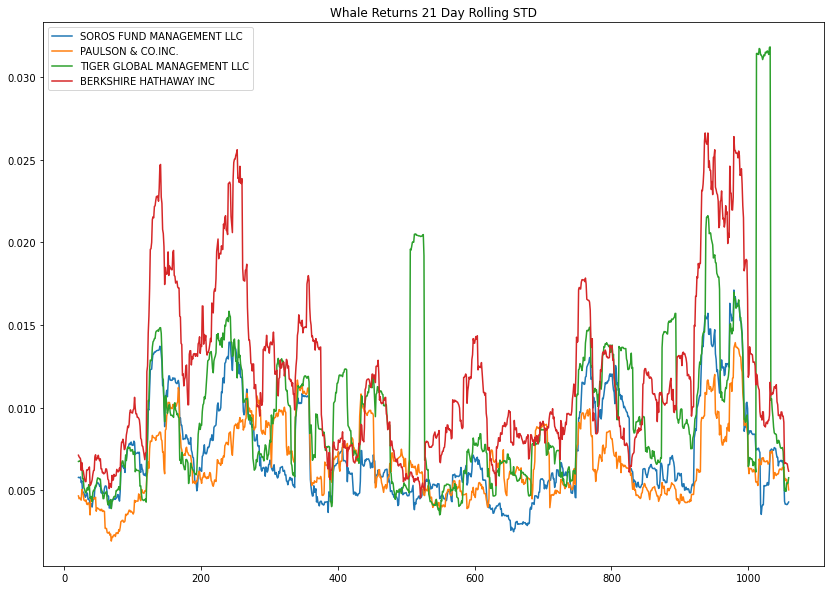

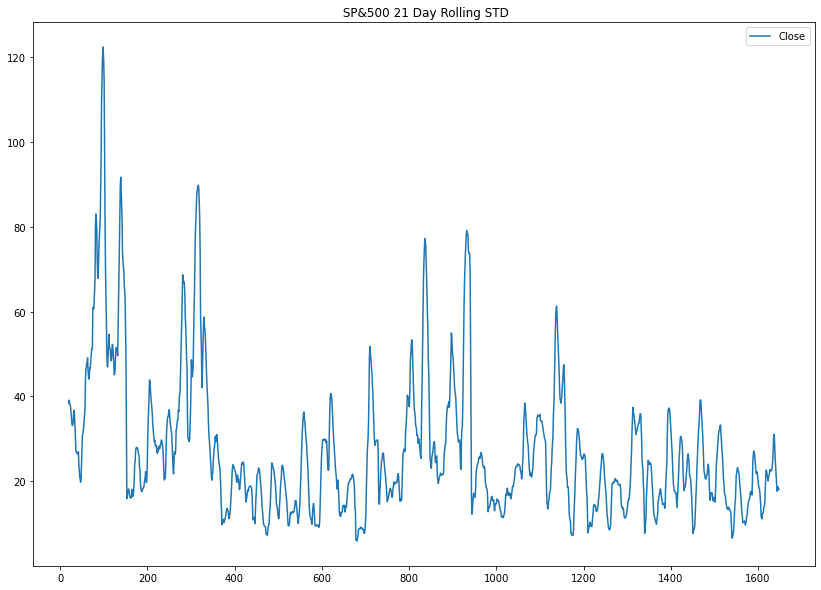

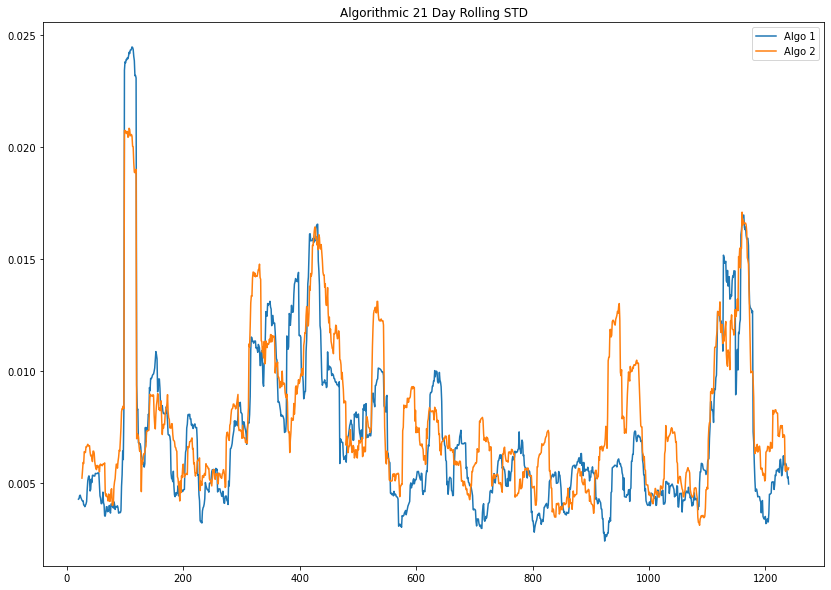

In [290]:
# Plot the rolling standard deviations
whale_rolling.plot(figsize=(14, 10), title="Whale Returns 21 Day Rolling STD")
sp500_rolling.plot(figsize=(14, 10), title=" SP&500 21 Day Rolling STD")
algo_rolling.plot(figsize=(14, 10), title="Algorithmic 21 Day Rolling STD")

In [291]:
# Calculate the correlation
correlation_whale = whale_returns.corr()
correlation_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000


In [292]:
# Display the whale correlation matrix
correlation_whale.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000


## Rolling Statistics Challenge: Exponentially Weighted Average 

In [293]:
# Use `ewm` to calculate the rolling window
whale_returns.ewm(halflife=20).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,0.002472,0.005814,0.001441,0.007624
3,0.002676,0.004966,0.002479,0.007017
4,0.005354,0.004615,0.004669,0.009392
...,...,...,...,...
1055,0.006929,0.006394,0.014682,0.010887
1056,0.006921,0.006500,0.014633,0.010810
1057,0.006802,0.006402,0.014435,0.010638
1058,0.006707,0.006311,0.014187,0.010514


<AxesSubplot:title={'center':'EWM of STD'}>

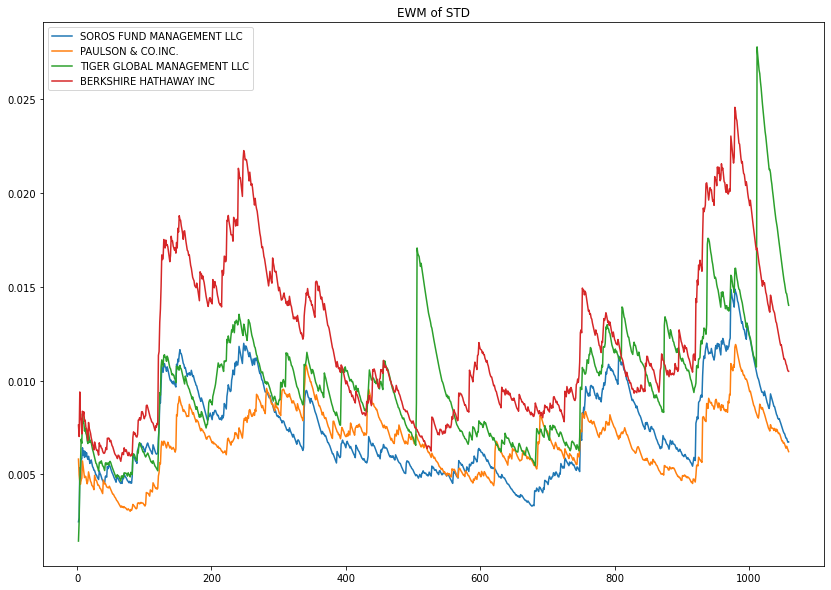

In [294]:
# Use `ewm` to calculate the rolling window
whale_returns.ewm(halflife=20).std().plot(figsize=(14,10), title= 'EWM of STD')

# Sharpe Ratios

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [305]:
# Whale Returns Sharpe Ratio
whale_sharpe_ratios = (whale_returns.mean() * 252) / (whale_returns.std() * np.sqrt (252))
whale_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64

<AxesSubplot:title={'center':'Whale Sharpe Ratio'}>

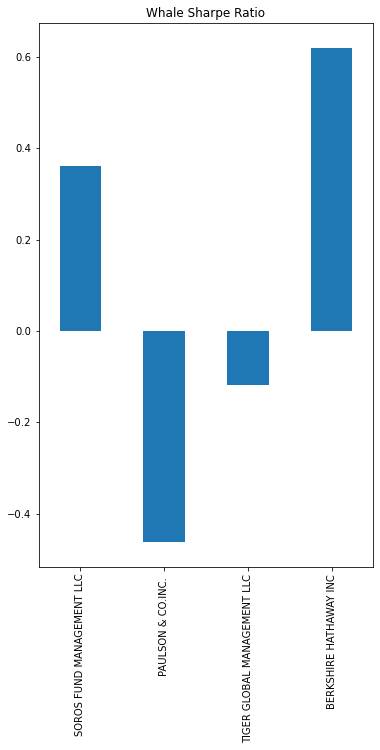

In [304]:
# Plot Whale Sharpe Ratio
whale_sharpe_ratios.plot(kind='bar', title= 'Whale Sharpe Ratio', figsize=(6, 10))

In [315]:
# SP 500 Sharpe Ratio
sp500_sharpe_ratios = (sp_500.mean() * 252) / (sp_500.std() * np.sqrt (252))
sp500_sharpe_ratios

Close    85.044155
dtype: float64

<AxesSubplot:title={'center':'S&P 500 Sharpe Ratio'}>

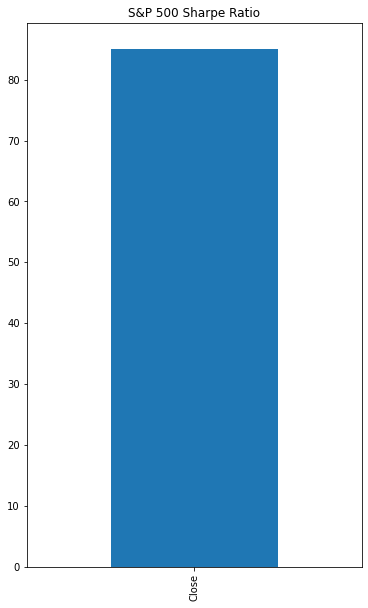

In [321]:
# Plot S&P 500 Sharpe Ratio
sp500_sharpe_ratios.plot(kind='bar', title= 'S&P 500 Sharpe Ratio', figsize=(6, 10))

In [318]:
# Algo Sharpe Ratio
algo_sharpe_ratios = (algo_returns.mean() * 252) / (algo_returns.std() * np.sqrt (252))
algo_sharpe_ratios

Algo 1    1.327397
Algo 2    0.639258
dtype: float64

<AxesSubplot:title={'center':'Whale Sharpe Ratio'}>

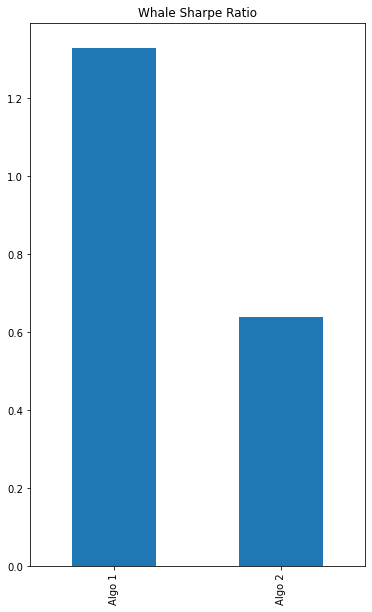

In [320]:
# Plot Algo Sharpe Ratio
algo_sharpe_ratios.plot(kind='bar', title= 'Algo Sharpe Ratio', figsize=(6, 10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
From my financial analysis shown above, the S&P 500 outperforms both the Whales portfolios and the Algorithmic returns!